Enter objective functions parameters 
Enter x value=20
Enter y value=10
Number of Equations 
3
Start entering constraints in fashion [x y constant leq/geq]
1
2
40
leq
3
1
30
geq
4
3
60
geq
Problem:
MINIMIZE
20*x + 10*y + 0
SUBJECT TO
_C1: x + 2 y <= 40

_C2: 3 x + y >= 30

_C3: 4 x + 3 y >= 60

VARIABLES
x Continuous
y Continuous

Bounded feasible region
Extream Point: ( 40.0 , 0 )  Value:  800.0
Extream Point: ( 15.0 , 0 )  Value:  300.0
Extream Point: ( 3.999999999999999 , 18.0 )  Value:  260.0
Extream Point: ( 6.0 , 12.000000000000007 )  Value:  240.00000000000006
Unique minimum solution
Minimum Solution: x= 6.0 y= 12.0 value= 240.0


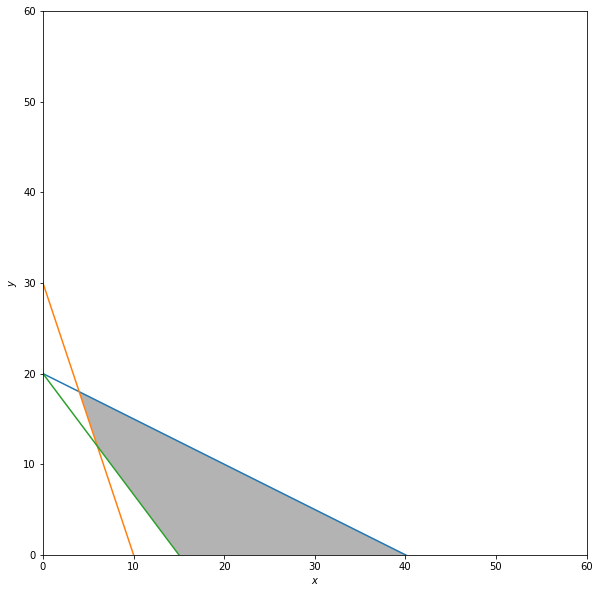

In [25]:
import pulp as p  
import matplotlib.pyplot as plt  
import numpy as np 
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from sympy import symbols, Eq, solve
import math

Lp_prob = p.LpProblem('Problem', p.LpMinimize)  

x = p.LpVariable("x", lowBound = 0)   
y = p.LpVariable("y", lowBound = 0)  

print('Enter objective functions parameters ')

x1=int(input('Enter x value='))
y1=int(input('Enter y value='))

t1=x1
t2=y1

Lp_prob += x1 * x + y1 * y    
print('Number of Equations ')
num = int(input())
print('Start entering constraints in fashion [x y constant leq/geq]')
x_coef=[]
y_coef=[]

rel=[]
x_points=[]
y_points=[]
x_points.append(0)
y_points.append(0)
constraint=[]
ext=set();
ext.add(tuple([0,0]))
for i in range(0,num):
    x1=int(input())
    y1=int(input())
    p1=int(input())
    s=input()
    rel.append(s)
    x_coef.append(x1)
    y_coef.append(y1)
    constraint.append(p1)
    
    if(s=='leq'):
        Lp_prob += x1 * x + y1 * y <= p1
    else:
        Lp_prob += x1 * x + y1 * y >= p1

    if(x1!=0):
        if(p1!=0):
            if((p1/x1)>0):
                x_points.append(p1/x1);
                y_points.append(0);
                ext.add(tuple([x_points[len(x_points)-1],y_points[len(x_points)-1]]))

    if(y1!=0):
        if(p1!=0):
            
            if(p1/y1>0):
                x_points.append(0);
                y_points.append(p1/y1);
                ext.add(tuple([x_points[len(x_points)-1],y_points[len(x_points)-1]]))
    
for i in range(len(x_coef)-1):
    j=i+1
    while j<len(x_coef) :
        A = np.array([[x_coef[i],y_coef[i]],[x_coef[j],y_coef[j]]])
        B = np.array([constraint[i],constraint[j]])
        det=np.linalg.det(A)
        if(det!=0):
            X = np.linalg.inv(A).dot(B)
            if(X[0]>0):
                if(X[1]>0):
                    x_points.append(X[0])
                    y_points.append(X[1])
                    ext.add(tuple([x_points[len(x_points)-1],y_points[len(x_points)-1]]))
        j+=1



eX=[]
eY=[]



for i in range (len(ext)):
    flag=0
    for j in range (len(x_coef)):
        a=(float)((list(ext)[i][0]*x_coef[j])+(list(ext)[i][1]*y_coef[j]))
        a=math.ceil(a)
        if(rel[j]=='leq'):
            if(a>constraint[j]):
                flag=1
        else:
            if(a<constraint[j]):
                flag=1
    
    if(flag==0):
        eX.append(list(ext)[i][0])
        eY.append(list(ext)[i][1])


value=[]
for i in range (len(eX)):
    a1=(t1*eX[i])+(t2*eY[i])
    value.append(a1)


    
print(Lp_prob)
status = Lp_prob.solve()# Solver 
st=p.LpStatus[status];
b=0;
for i in range (len(rel)):
     if(rel[i]=='geq'):
            b+=1

if(len(eX)==0):
    print('Infeasible region')
else :
    if(b==len(rel)):
         print('Unbounded feasible region')
    else :
        b=0;
        for i in range(len(eX)):
             if(eX[i]!=0):
                    if(eY[i]!=0):
                         b=1;
        if(b==0):
            print('Unbounded feasible region')
        else :
            print('Bounded feasible region')    


for i in range (len(eX)):
    print('Extream Point: (',eX[i],',',eY[i],')',' Value: ',value[i]);
    
if(st!='Infeasible'):
        print('Unique minimum solution')
        print('Minimum Solution:','x=',p.value(x),'y=', p.value(y),'value=', p.value(Lp_prob.objective))   
#make a plot
y_axis=[]
x2 = np.linspace(0, 60, 2000)
plt.figure(figsize=(10,10))
for i in range(0,num):
    if(y_coef[i]==0):
        plt.axvline(constraint[i]/x_coef[i])
    y1=(constraint[i]-x_coef[i]*x2)/y_coef[i]
    y_axis.append(y1)

for i in range(0,num): 
    plt.plot(x2, y_axis[i])

plt.xlim((0, 60))
plt.ylim((0, 60))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

#plot a feasible region 
x8,y8 = np.meshgrid(x2,x2)
flag=0;
for i in range(0,num):
    if(rel[i]=='leq'):
            if(flag==0):
                plots=(y_coef[i]*y8+x_coef[i]*x8<=constraint[i])
                flag=1
            else:
                plots=(plots & (y_coef[i]*y8+x_coef[i]*x8<=constraint[i]))
    else:
        if(flag==0):
            plots=(y_coef[i]*y8+x_coef[i]*x8>=constraint[i])
            flag=1
        else:
            plots=(plots & (y_coef[i]*y8+x_coef[i]*x8>=constraint[i]))
            
         
    
        
plt.imshow( ((plots)).astype(int) , 
                extent=(x8.min(),x8.max(),y8.min(),y8.max()),origin="lower", cmap="Greys", alpha = 0.3);